In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data svm.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

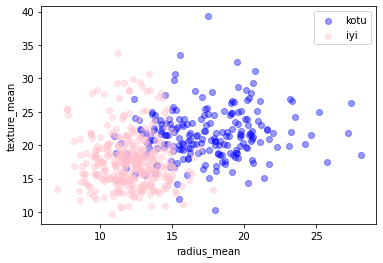

In [9]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

plt.scatter(M.radius_mean,M.texture_mean,color="blue",label="kotu",alpha= 0.4)
plt.scatter(B.radius_mean,B.texture_mean,color="pink",label="iyi",alpha= 0.4)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [3]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [4]:
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [5]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [6]:
from sklearn.svm import SVC
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
#test
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

print accuracy of svm algo:  0.9532163742690059


In [9]:
y_pred = svm.predict(x_test)  
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[108,   0],
       [  8,  55]], dtype=int64)